In [1]:
import pandas as pd 
df = pd.read_csv('FFE_Final.csv')
df.head()

,Unnamed: 0,Current Energy Efficiency (EPC Score),Potential Energy Efficiency (EPC Score),Total Floor Area (m²),Has Mains Gas,Main Heating Controls,Proportion of Multi-Glazing (%),Number of Extensions,Number of Habitable Rooms,Number of Heated Rooms,...,Area Code Average Price (Thousands),Town/City Average Price (Thousands),District Average Price (Thousands),County Average Price (Thousands),LAT,LONG,CONSTRUCTION_AGE_BAND_ENCODED,Unemployment rate (%),Inflation rate (%),Interest rate (%)
0,0,67,81,114.00,1,2106.0,100.0,0.0,7.0,7.0,...,509.765715,530.746784,568.433804,645.455468,51.28642,-0.102036,8.0,4.2,2.7,0.5
1,1,56,75,73.00,1,2106.0,100.0,0.0,3.0,3.0,...,234.753208,241.138835,240.143335,240.143335,51.60790,-2.998804,3.0,4.2,2.7,0.5
2,2,73,78,70.68,1,2106.0,100.0,0.0,4.0,4.0,...,286.342986,244.265774,230.722625,230.722625,50.40687,-4.140917,8.0,4.2,2.7,0.5
3,3,69,82,164.00,1,2106.0,100.0,3.0,3.0,3.0,...,509.765715,530.746784,568.433804,645.455468,51.29551,-0.090731,2.0,4.2,2.7,0.5
4,4,72,84,111.00,1,2106.0,100.0,2.0,6.0,6.0,...,161.762966,175.479423,177.625737,214.225080,54.86281,-1.425920,4.0,4.2,2.7,0.5


In [2]:
import sklearn
from sklearn.model_selection import train_test_split
y_data = df['Price (Thousands)']
x_data = df.drop(columns=['Price (Thousands)'])

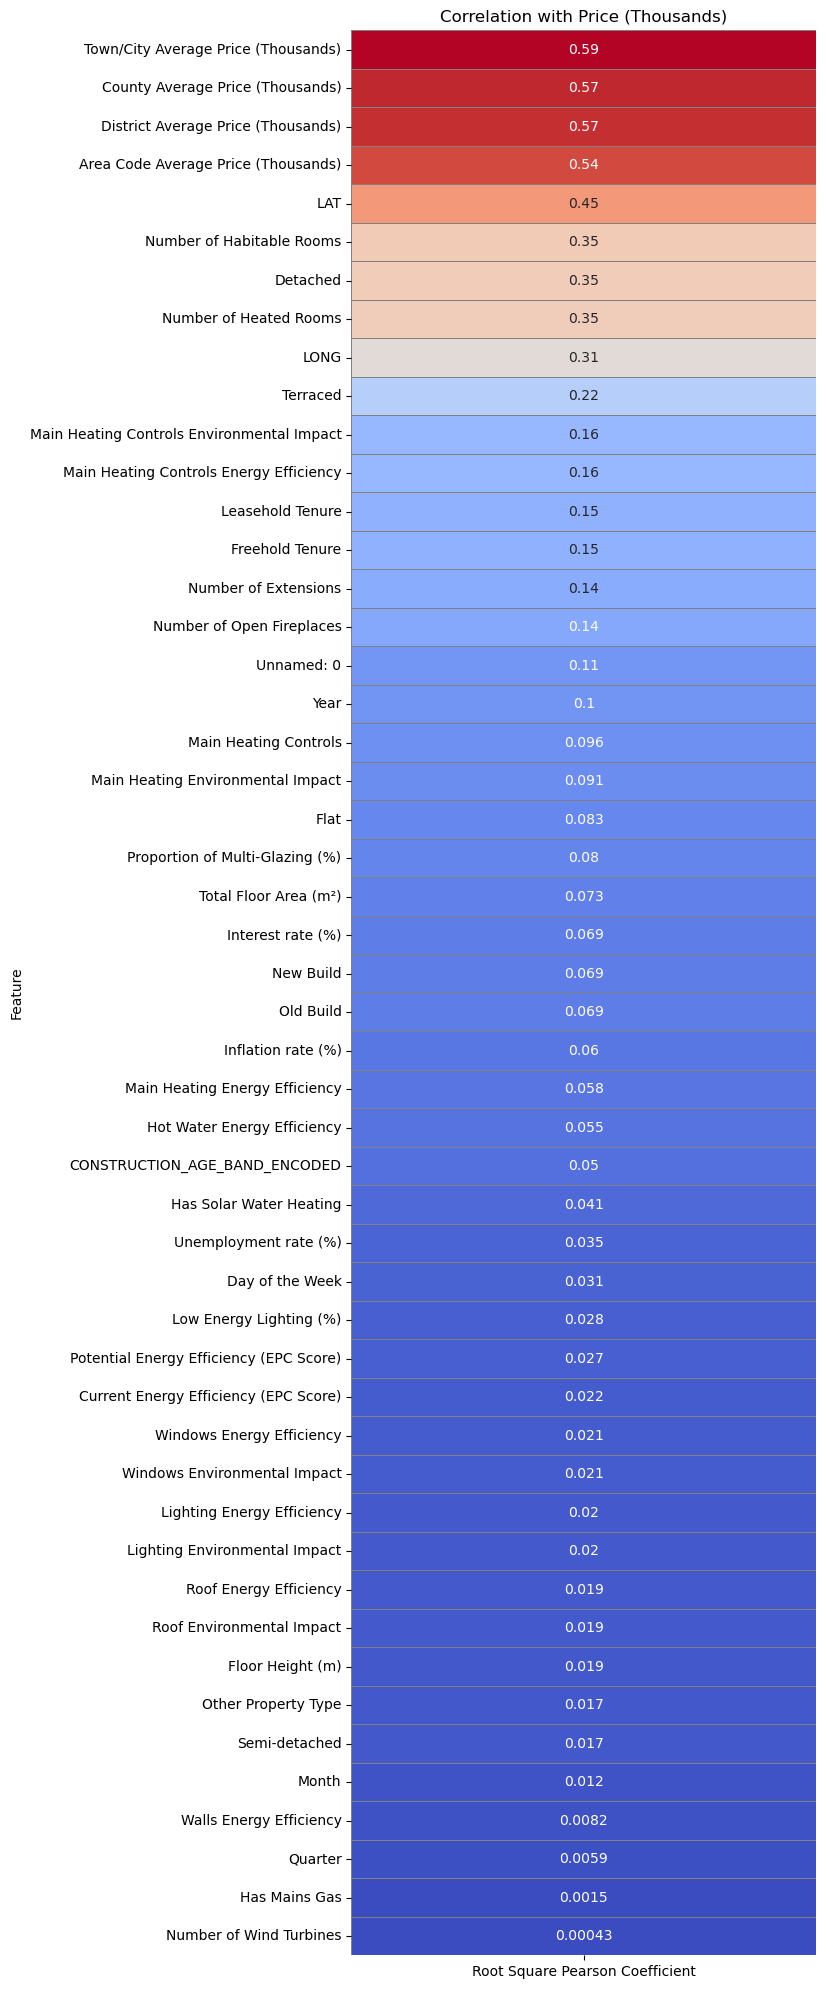

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

p_score_df = []
for col in x_data:
    pearson_coef, p_value = stats.pearsonr(y_data, x_data[col])
    pcrs = np.sqrt(pearson_coef ** 2)
    p_score_df.append([col, pearson_coef, p_value, pcrs])

p_score_df = pd.DataFrame(p_score_df, columns=["Feature", "Pearson Coefficient", "P-value", "Root Square Pearson Coefficient"])
p_score_df.set_index("Feature", inplace=True)
p_score_df = p_score_df.sort_values(by="Root Square Pearson Coefficient", ascending=False)

plt.figure(figsize=(6, len(p_score_df) * 0.5))
sns.heatmap(p_score_df[["Root Square Pearson Coefficient"]], annot=True, cmap='coolwarm', cbar=False,
            linewidths=0.5, linecolor='gray')

plt.yticks(rotation=0)
plt.title("Correlation with Price (Thousands)")
plt.show()


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 1)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred_lm = lm.predict(x_test)
print("Linear Regression- MAE:", mean_absolute_error(y_test, y_pred_lm))
print("Linear Regression- MSE:", mean_squared_error(y_test, y_pred_lm))
print("Linear Regression- R-squared:", r2_score(y_test, y_pred_lm))

Linear Regression- MAE: 63.25361928268358
Linear Regression- MSE: 33119.91134720209
Linear Regression- R-squared: -0.1850275129630492


In [6]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)
print("XG Boost- MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XG Boost- MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XG Boost- R-squared:", r2_score(y_test, y_pred_xgb))

XG Boost- MAE: 44.92474446997769
XG Boost- MSE: 4540.6216559251
XG Boost- R-squared: 0.8375369567925598


In [7]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [8]:
from sklearn.model_selection import RandomizedSearchCV

hyperparameter_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth':[2,3,5],
    'learning_rate':[0.05,0.1,0.15],
    'min_child_weight':[1,2],
    'booster':['gbtree'],
    'base_score':[0.25,0.5]
}

random_cv = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=hyperparameter_grid,
    cv=3, n_iter=20,
    scoring='neg_mean_absolute_error',
    n_jobs=1,
    verbose=2,
    return_train_score=True,
    random_state=42
)

random_cv.fit(x_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=2, n_estimators=500; total time=  48.1s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=2, n_estimators=500; total time=  48.6s
[CV] END base_score=0.5, booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=2, n_estimators=500; total time=  48.0s
[CV] END base_score=0.25, booster=gbtree, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300; total time=  37.3s
[CV] END base_score=0.25, booster=gbtree, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300; total time=  36.4s
[CV] END base_score=0.25, booster=gbtree, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300; total time=  35.5s
[CV] END base_score=0.25, booster=gbtree, learning_rate=0.05, max_depth=2, min_child_weight=2, n_estimators=300; total time=  32.1s
[CV] END base_score=0

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=1,
                   param_distributions={'base_score': [0.25, 0.5],
                                        'booster': ['gbtree'],
                                        'learning_rate': [0.05, 0.1, 0.15],
                                        'max_depth': [2, 3, 5],
                                        'min_child_weight': [1, 2],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [9]:
best_model = random_cv.best_estimator_

y_pred = best_model.predict(x_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}")


MAE: 44.7832, RMSE: 4525.6270, R^2: 0.8381


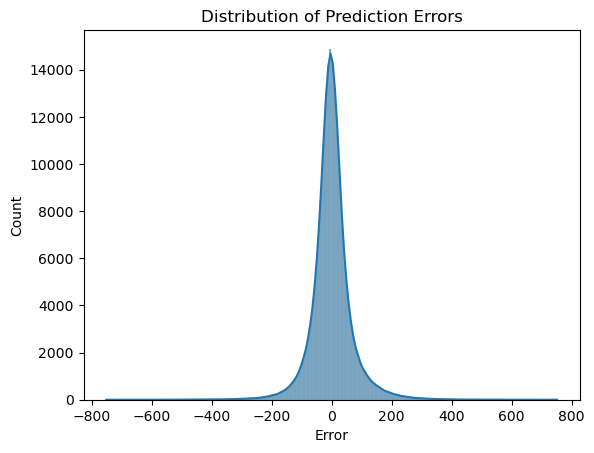

In [10]:
import seaborn as sns

errors = y_test - y_pred
sns.histplot(errors, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.show()

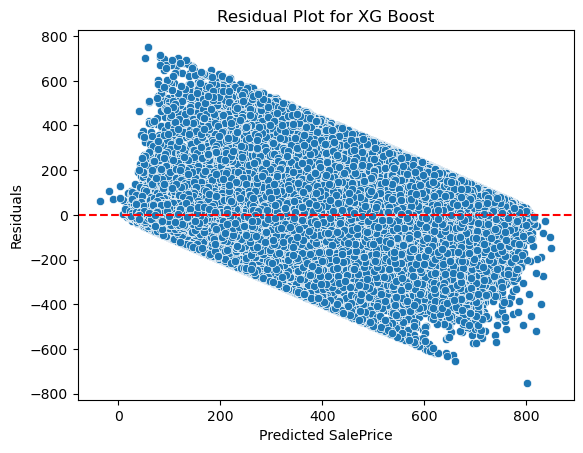

In [11]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for XG Boost')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.show()